In [1]:
from google.colab import files
uploaded = files.upload()

Saving Clean Coles Woolworths Dated.xlsx to Clean Coles Woolworths Dated.xlsx


In [28]:
import warnings
# suppress all warnings
warnings.filterwarnings("ignore")

In [29]:
import pandas as pd

# file is in excel
file_name = next(iter(uploaded))
# load all sheets into df
xl = pd.ExcelFile(file_name)

sheets = xl.sheet_names

# find sheets with specific word in the name

word = "Woolworths 1" # word to find

woolworths_sheets = {sheet_name :xl.parse(sheet_name) for sheet_name in sheets if word.lower() in sheet_name.lower()}

## print loaded sheets
print("Loaded Sheets:", list(woolworths_sheets.keys()))

Loaded Sheets: ['Sun4AugWoolworths 1', 'Tue03SepWoolworths 1', 'Tue10SepWoolworths 1', 'Tue27AugWoolworths 1', 'Wed04SepWoolworths 1']


In [30]:
import re
from datetime import datetime

# Function to clean the text
date_pattern = re.compile(r'\d{1,2}[A-Za-z]{3}')

# Dictionary to hold all reformatted data
all_data = {}

column_names = ["Product Code",	"Category",	"Item Name",	"Best Price",	"Best Unit Price",	"Item Price",	"Unit Price"]

In [31]:
for sheet_name, data in woolworths_sheets.items():
    # Extract date from sheet name
    date_match = date_pattern.search(sheet_name)
    # print(date_match)
    print(f"SheetName: {sheet_name} ")
    if date_match:
        date_str = date_match.group() +"24"
        print(date_str)
        # Convert date string to datetime object
        date = datetime.strptime(date_str, '%d%b%y').date()
        # Select and rename columns as needed
        data = data[column_names]
        data['Date'] = date
        all_data[date] = data
    else:
        print(f"No date found in sheet name: {sheet_name}")

SheetName: Sun4AugWoolworths 1 
4Aug24
SheetName: Tue03SepWoolworths 1 
03Sep24
SheetName: Tue10SepWoolworths 1 
10Sep24
SheetName: Tue27AugWoolworths 1 
27Aug24
SheetName: Wed04SepWoolworths 1 
04Sep24


In [32]:
test_date = list(all_data.keys())[0]

data = all_data[test_date]
print(data.head())

print("Date:", test_date)



   Product Code     Category                    Item Name  Best Price  \
0        133211  Fruit & Veg       Cavendish Bananas Each        0.77   
1        134034  Fruit & Veg            Fresh Tomato Each        0.65   
2        144607  Fruit & Veg     Strawberries 250g Punnet        4.00   
3        105919  Fruit & Veg  Fresh Pink Lady Apples Each        0.86   
4        169438  Fruit & Veg          Truss Tomatoes Each        0.83   

  Best Unit Price  Item Price    Unit Price        Date  
0     $0.77 / 1EA        0.77   $0.77 / 1EA  2024-08-04  
1     $0.65 / 1EA        0.65   $0.65 / 1EA  2024-08-04  
2    $16.00 / 1KG        4.00  $16.00 / 1KG  2024-08-04  
3     $0.86 / 1EA        0.86   $0.86 / 1EA  2024-08-04  
4     $0.83 / 1EA        0.83   $0.83 / 1EA  2024-08-04  
Date: 2024-08-04


In [33]:
# Identify duplicates based on 'Product Code' column
duplicates = data[data.duplicated('Product Code', keep=False)]

# Count unique product codes that are duplicated
num_unique_duplicates = duplicates['Product Code'].nunique()

print(f"Number of unique product codes with duplicates on {test_date}: {num_unique_duplicates}")


# Check and display rows where 'Product Code' is duplicated
if not duplicates.empty:
    # Sample a few product codes to display
    sample_product_codes = duplicates['Product Code'].unique()[:5]  # Adjust the slice as needed

    for product_code in sample_product_codes:
        print(f"Rows for Product Code {product_code}:")
        display(duplicates[duplicates['Product Code'] == product_code])

Number of unique product codes with duplicates on 2024-08-04: 2351
Rows for Product Code 524322:


,Product Code,Category,Item Name,Best Price,Best Unit Price,Item Price,Unit Price,Date
24,524322,Fruit & Veg,Woolworths Baby Leaf Spinach 120g,2.5,$20.83 / 1KG,2.5,$20.83 / 1KG,2024-08-04
1909,524322,"Dairy, Eggs & Fridge",Woolworths Baby Leaf Spinach 120g,2.5,$20.83 / 1KG,2.5,$20.83 / 1KG,2024-08-04


Rows for Product Code 315670:


,Product Code,Category,Item Name,Best Price,Best Unit Price,Item Price,Unit Price,Date
100,315670,Fruit & Veg,Woolworths Finely Shredded Coleslaw 300g,3.0,$10.00 / 1KG,3.0,$10.00 / 1KG,2024-08-04
1966,315670,"Dairy, Eggs & Fridge",Woolworths Finely Shredded Coleslaw 300g,3.0,$10.00 / 1KG,3.0,$10.00 / 1KG,2024-08-04


Rows for Product Code 705439:


,Product Code,Category,Item Name,Best Price,Best Unit Price,Item Price,Unit Price,Date
104,705439,Fruit & Veg,Woolworths Baby Spinach & Rocket 120g,2.5,$20.83 / 1KG,2.5,$20.83 / 1KG,2024-08-04
1971,705439,"Dairy, Eggs & Fridge",Woolworths Baby Spinach & Rocket 120g,2.5,$20.83 / 1KG,2.5,$20.83 / 1KG,2024-08-04


Rows for Product Code 714823:


,Product Code,Category,Item Name,Best Price,Best Unit Price,Item Price,Unit Price,Date
120,714823,Fruit & Veg,Woolworths Leafy Mix Salad 200g,3.0,$15.00 / 1KG,3.0,$15.00 / 1KG,2024-08-04
2026,714823,"Dairy, Eggs & Fridge",Woolworths Leafy Mix Salad 200g,3.0,$15.00 / 1KG,3.0,$15.00 / 1KG,2024-08-04


Rows for Product Code 531041:


,Product Code,Category,Item Name,Best Price,Best Unit Price,Item Price,Unit Price,Date
134,531041,Fruit & Veg,Woolworths Classic Coleslaw 200g,2.0,$10.00 / 1KG,2.0,$10.00 / 1KG,2024-08-04
2070,531041,"Dairy, Eggs & Fridge",Woolworths Classic Coleslaw 200g,2.0,$10.00 / 1KG,2.0,$10.00 / 1KG,2024-08-04


In [34]:
if not duplicates.empty:
    # Sample a few product codes to display
    sample_product_codes = duplicates['Product Code'].unique()[:11]  # Adjust the slice as needed

    for product_code in sample_product_codes:
        # print(f"Rows for Product Code {product_code}:")
        display(duplicates[duplicates['Product Code'] == product_code])


#after manually check nearly all products have same unit price, best price, and price, so we can safely remove all duplicates from data frame

,Product Code,Category,Item Name,Best Price,Best Unit Price,Item Price,Unit Price,Date
24,524322,Fruit & Veg,Woolworths Baby Leaf Spinach 120g,2.5,$20.83 / 1KG,2.5,$20.83 / 1KG,2024-08-04
1909,524322,"Dairy, Eggs & Fridge",Woolworths Baby Leaf Spinach 120g,2.5,$20.83 / 1KG,2.5,$20.83 / 1KG,2024-08-04


,Product Code,Category,Item Name,Best Price,Best Unit Price,Item Price,Unit Price,Date
100,315670,Fruit & Veg,Woolworths Finely Shredded Coleslaw 300g,3.0,$10.00 / 1KG,3.0,$10.00 / 1KG,2024-08-04
1966,315670,"Dairy, Eggs & Fridge",Woolworths Finely Shredded Coleslaw 300g,3.0,$10.00 / 1KG,3.0,$10.00 / 1KG,2024-08-04


,Product Code,Category,Item Name,Best Price,Best Unit Price,Item Price,Unit Price,Date
104,705439,Fruit & Veg,Woolworths Baby Spinach & Rocket 120g,2.5,$20.83 / 1KG,2.5,$20.83 / 1KG,2024-08-04
1971,705439,"Dairy, Eggs & Fridge",Woolworths Baby Spinach & Rocket 120g,2.5,$20.83 / 1KG,2.5,$20.83 / 1KG,2024-08-04


,Product Code,Category,Item Name,Best Price,Best Unit Price,Item Price,Unit Price,Date
120,714823,Fruit & Veg,Woolworths Leafy Mix Salad 200g,3.0,$15.00 / 1KG,3.0,$15.00 / 1KG,2024-08-04
2026,714823,"Dairy, Eggs & Fridge",Woolworths Leafy Mix Salad 200g,3.0,$15.00 / 1KG,3.0,$15.00 / 1KG,2024-08-04


,Product Code,Category,Item Name,Best Price,Best Unit Price,Item Price,Unit Price,Date
134,531041,Fruit & Veg,Woolworths Classic Coleslaw 200g,2.0,$10.00 / 1KG,2.0,$10.00 / 1KG,2024-08-04
2070,531041,"Dairy, Eggs & Fridge",Woolworths Classic Coleslaw 200g,2.0,$10.00 / 1KG,2.0,$10.00 / 1KG,2024-08-04


,Product Code,Category,Item Name,Best Price,Best Unit Price,Item Price,Unit Price,Date
141,233376,Fruit & Veg,Woolworths Caesar Salad Kit 290g,5.5,$18.97 / 1KG,5.5,$18.97 / 1KG,2024-08-04
2109,233376,"Dairy, Eggs & Fridge",Woolworths Caesar Salad Kit 290g,5.5,$18.97 / 1KG,5.5,$18.97 / 1KG,2024-08-04


,Product Code,Category,Item Name,Best Price,Best Unit Price,Item Price,Unit Price,Date
149,921080,Fruit & Veg,Just Veg. Carrot Sticks 300g,3.3,$11.00 / 1KG,3.3,$11.00 / 1KG,2024-08-04
2130,921080,"Dairy, Eggs & Fridge",Just Veg. Carrot Sticks 300g,3.3,$11.00 / 1KG,3.3,$11.00 / 1KG,2024-08-04


,Product Code,Category,Item Name,Best Price,Best Unit Price,Item Price,Unit Price,Date
153,379518,Fruit & Veg,Woolworths Baby Spinach & Rocket 60g,2.0,$33.33 / 1KG,2.0,$33.33 / 1KG,2024-08-04
2141,379518,"Dairy, Eggs & Fridge",Woolworths Baby Spinach & Rocket 60g,2.0,$33.33 / 1KG,2.0,$33.33 / 1KG,2024-08-04


,Product Code,Category,Item Name,Best Price,Best Unit Price,Item Price,Unit Price,Date
158,317566,Fruit & Veg,Woolworths Baby Leaf With Beetroot & Carrot 180g,4.0,$22.22 / 1KG,4.0,$22.22 / 1KG,2024-08-04
2159,317566,"Dairy, Eggs & Fridge",Woolworths Baby Leaf With Beetroot & Carrot 180g,4.0,$22.22 / 1KG,4.0,$22.22 / 1KG,2024-08-04


,Product Code,Category,Item Name,Best Price,Best Unit Price,Item Price,Unit Price,Date
169,748851,Fruit & Veg,Woolworths Celery Heart Each,4.0,$4.00 / 1EA,4.0,$4.00 / 1EA,2024-08-04
9377,748851,Snacks & Confectionery,Woolworths Celery Heart Each,4.0,$4.00 / 1EA,4.0,$4.00 / 1EA,2024-08-04


,Product Code,Category,Item Name,Best Price,Best Unit Price,Item Price,Unit Price,Date
176,921142,Fruit & Veg,Just Veg. Carrot Shred 300g,3.3,$11.00 / 1KG,3.3,$11.00 / 1KG,2024-08-04
2173,921142,"Dairy, Eggs & Fridge",Just Veg. Carrot Shred 300g,3.3,$11.00 / 1KG,3.3,$11.00 / 1KG,2024-08-04


In [35]:
# removing duplicate rows from all sheets based on product code
for date, df in all_data.items():
    # Remove duplicates - keep the first one
    unique_df = df.drop_duplicates(subset='Product Code', keep='first')

    # Replace the og DF with the deduplicated DF
    all_data[date] = unique_df

    # Optionally print out some information
    print(f"Processed {date}: reduced from {len(df)} to {len(unique_df)} rows")

Processed 2024-08-04: reduced from 22365 to 19907 rows
Processed 2024-09-03: reduced from 24570 to 21342 rows
Processed 2024-09-10: reduced from 24722 to 21459 rows
Processed 2024-08-27: reduced from 23787 to 20637 rows
Processed 2024-09-04: reduced from 24778 to 21504 rows


In [36]:
import pandas as pd

# Create an empty DF to store all cobimned data
combined_df = pd.DataFrame()

# go through each DF in all_data and merge
for date, df in all_data.items():
    # Select the relevant columns and add a 'Date' column
    selected_data = df[['Category', 'Item Name', 'Product Code', 'Item Price', 'Best Price']].copy()
    selected_data['Date'] = pd.to_datetime(date)  # Corrected Date Format

    # show shape of each df
    print(f"Date: {date}, Shape: {selected_data.shape}")
    # Append to the combined DF
    combined_df = pd.concat([combined_df, selected_data], ignore_index=True)

    ## show increased number of rows
    print(f"Combined DF Shape: {combined_df.shape}")

# show DF
print(combined_df.shape)
print(combined_df.head())

Date: 2024-08-04, Shape: (19907, 6)
Combined DF Shape: (19907, 6)
Date: 2024-09-03, Shape: (21342, 6)
Combined DF Shape: (41249, 6)
Date: 2024-09-10, Shape: (21459, 6)
Combined DF Shape: (62708, 6)
Date: 2024-08-27, Shape: (20637, 6)
Combined DF Shape: (83345, 6)
Date: 2024-09-04, Shape: (21504, 6)
Combined DF Shape: (104849, 6)
(104849, 6)
      Category                    Item Name  Product Code  Item Price  \
0  Fruit & Veg       Cavendish Bananas Each        133211        0.77   
1  Fruit & Veg            Fresh Tomato Each        134034        0.65   
2  Fruit & Veg     Strawberries 250g Punnet        144607        4.00   
3  Fruit & Veg  Fresh Pink Lady Apples Each        105919        0.86   
4  Fruit & Veg          Truss Tomatoes Each        169438        0.83   

   Best Price       Date  
0        0.77 2024-08-04  
1        0.65 2024-08-04  
2        4.00 2024-08-04  
3        0.86 2024-08-04  
4        0.83 2024-08-04  


In [37]:
# Set date and product code as a multi-index
combined_df.set_index(['Date', 'Product Code'], inplace=True)

# Sort the df by the index (Date and Product Code)
combined_df.sort_index(inplace=True)

# Display the df to verify the structure
print(combined_df.head())

                                       Category  \
Date       Product Code                           
2024-08-04 25            Snacks & Confectionery   
           86                            Pantry   
           168                           Pantry   
           287                           Pantry   
           326                           Pantry   

                                                                 Item Name  \
Date       Product Code                                                      
2024-08-04 25               Arnott's Caramel Crown Chocolate Biscuits 200g   
           86            Pearl River Bridge Soy Sauce Superior Light 500ml   
           168                                      Tcc Coconut Milk 400ml   
           287                              Leatherwood Organic Honey 500g   
           326                          Essentials Chunky Pasta Sauce 700g   

                         Item Price  Best Price  
Date       Product Code                      

In [38]:
combined_df

Category  \
Date       Product Code                           
2024-08-04 25            Snacks & Confectionery   
           86                            Pantry   
           168                           Pantry   
           287                           Pantry   
           326                           Pantry   
...                                         ...   
2024-09-10 997702          Beer, Wine & Spirits   
           997704          Beer, Wine & Spirits   
           997705          Beer, Wine & Spirits   
           997833          Beer, Wine & Spirits   
           997834          Beer, Wine & Spirits   

                                                                 Item Name  \
Date       Product Code                                                      
2024-08-04 25               Arnott's Caramel Crown Chocolate Biscuits 200g   
           86            Pearl River Bridge Soy Sauce Superior Light 500ml   
           168                                      Tcc Coconut Milk 400ml   
           287                              Leatherwood Organic Honey 500g   
           326                          Essentials Chunky Pasta Sauce 700g   
...                                                                    ...   
2024-09-10 997702        Nelson County Zero Sugar Bourbon & Cola 375ml ...   
           997704                      Beck's Lager Bottles 330ml X24 Case   
           997705                       Beck's Lager Bottles 330ml X6 Pack   
           997833               Capital Brewing Co. Xpa Cans 375ml X4 Pack   
           997834              Capital Brewing Co. Xpa Cans 375ml X16 Case   

                         Item Price  Best Price  
Date       Product Code                          
2024-08-04 25                  4.00        4.00  
           86                  3.30        3.30  
           168                 2.30        2.30  
           287                14.00       14.00  
           326                 2.75        2.75  
...                             ...         ...  
2024-09-10 997702             25.00       25.00  
           997704             53.00       53.00  
           997705             20.00       20.00  
           997833             20.50       20.50  
           997834             63.00       63.00  

[104849 rows x 4 columns]

In [39]:
!pip install pandas numpy matplotlib statsmodels pmdarima

In [40]:
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima
import matplotlib.pyplot as plt


## resetting index
combined_df.reset_index(inplace=True)
## ensure datetime format for Date and set index as Date
combined_df['Date'] = pd.to_datetime(combined_df['Date'])
combined_df.set_index('Date', inplace=True)

In [41]:
combined_df


,Product Code,Category,Item Name,Item Price,Best Price
Date,,,,,
2024-08-04,25,Snacks & Confectionery,Arnott's Caramel Crown Chocolate Biscuits 200g,4.00,4.00
2024-08-04,86,Pantry,Pearl River Bridge Soy Sauce Superior Light 500ml,3.30,3.30
2024-08-04,168,Pantry,Tcc Coconut Milk 400ml,2.30,2.30
2024-08-04,287,Pantry,Leatherwood Organic Honey 500g,14.00,14.00
2024-08-04,326,Pantry,Essentials Chunky Pasta Sauce 700g,2.75,2.75
...,...,...,...,...,...
2024-09-10,997702,"Beer, Wine & Spirits",Nelson County Zero Sugar Bourbon & Cola 375ml ...,25.00,25.00
2024-09-10,997704,"Beer, Wine & Spirits",Beck's Lager Bottles 330ml X24 Case,53.00,53.00
2024-09-10,997705,"Beer, Wine & Spirits",Beck's Lager Bottles 330ml X6 Pack,20.00,20.00


## Moving Average Model for price prediction

In [42]:
all_data.keys()

dict_keys([datetime.date(2024, 8, 4), datetime.date(2024, 9, 3), datetime.date(2024, 9, 10), datetime.date(2024, 8, 27), datetime.date(2024, 9, 4)])

In [71]:

import random
## dict to store forecasts
forecasts = {}


## get all unique product codes
product_codes = combined_df['Product Code'].unique()

# PRINT COUNT OF UNIQUE PRODS
print(f"Number of unique product codes: {len(product_codes)}")

## set seed
random.seed(42)
ProdCount = 100 #
window = 10 # the period of rolling moving average window
forecast_Days = 5 # we are forecasting next 3 days
# ProdCount = len(product_codes) # <<<<uncomment to run on whole data
# Sample a few prod codes for output and plots
sampled_product_codes = random.sample(list(product_codes),ProdCount)
## number of sheets in Gsheet
NumberofDates = len(list(all_data.keys()))

# Process each product code
for product_code in sampled_product_codes:
    # Filter data for the current product code
    product_data = combined_df[combined_df['Product Code'] == product_code]
    # print(product_data)
    ts = product_data['Item Price'].astype(float).resample('D').last().fillna(method = 'ffill')

    # prep the ts data
    # ts = product_data['Item Price'].astype(float).dropna().resample('D').last().
    # print(ts)
    if len(ts) >= window:# check if we have sufficient data points
        ## calculate Winfdow preiod MA

        ma = ts.rolling(window=window).mean()
        if not ma.empty:
          forecast_values = []
          extended_ts = ma.copy()

          # forecast for next n days iteratively
          for i in range(forecast_Days):
            if len(extended_ts) >= window:
              next_forecast = round(extended_ts[-window:].mean(),2)
              forecast_values.append(next_forecast)
              # extended_ts = extended_ts.append(pd.Series([next_forecast], index=[extended_ts.index[-1] + pd.DateOffset(days=1)]))
              extended_ts = pd.concat([extended_ts, pd.Series([next_forecast], index=[extended_ts.index[-1] + pd.DateOffset(days=1)])])
            else:
              break # not enuf data to proceed

          forecasts[product_code] = {'forecast': forecast_values, 'method': f'{window} period Moving Average'}

        else:
          forecasts[product_code] = {'forecast': [ts.iloc[-1]]*forecast_Days, 'method': f'{window} period Moving Average'}

    else:
        # Use last available price for forecasting

        forecasts[product_code] = {'forecast': [ts.iloc[-1]]*forecast_Days, 'method': f'{window} period Moving Average'}



## print few samples for verification
for code, data in forecasts.items():
  print(f"Product Code: {code}, Forecast: {data['forecast']}, Method: {data['method']}")

Number of unique product codes: 22625
Product Code: 321163, Forecast: [4.15, 4.15, 4.15, 4.15, 4.15], Method: 10 period Moving Average
Product Code: 110572, Forecast: [14.05, 14.1, 14.14, 14.18, 14.2], Method: 10 period Moving Average
Product Code: 33637, Forecast: [2.2, 2.2, 2.2, 2.2, 2.2], Method: 10 period Moving Average
Product Code: 261341, Forecast: [6.0, 6.0, 6.0, 6.0, 6.0], Method: 10 period Moving Average
Product Code: 235131, Forecast: [4.75, 4.75, 4.75, 4.75, 4.75], Method: 10 period Moving Average
Product Code: 221696, Forecast: [4.4, 4.4, 4.4, 4.4, 4.4], Method: 10 period Moving Average
Product Code: 143627, Forecast: [6.76, 6.8, 6.83, 6.86, 6.86], Method: 10 period Moving Average
Product Code: 102976, Forecast: [3.9, 3.9, 3.9, 3.9, 3.9], Method: 10 period Moving Average
Product Code: 217927, Forecast: [14.9, 14.9, 14.9, 14.9, 14.9], Method: 10 period Moving Average
Product Code: 816101, Forecast: [7.0, 7.0, 7.0, 7.0, 7.0], Method: 10 period Moving Average
Product Code: 91

Product Code: 321163, Category: Pantry, Item Name: Pantry


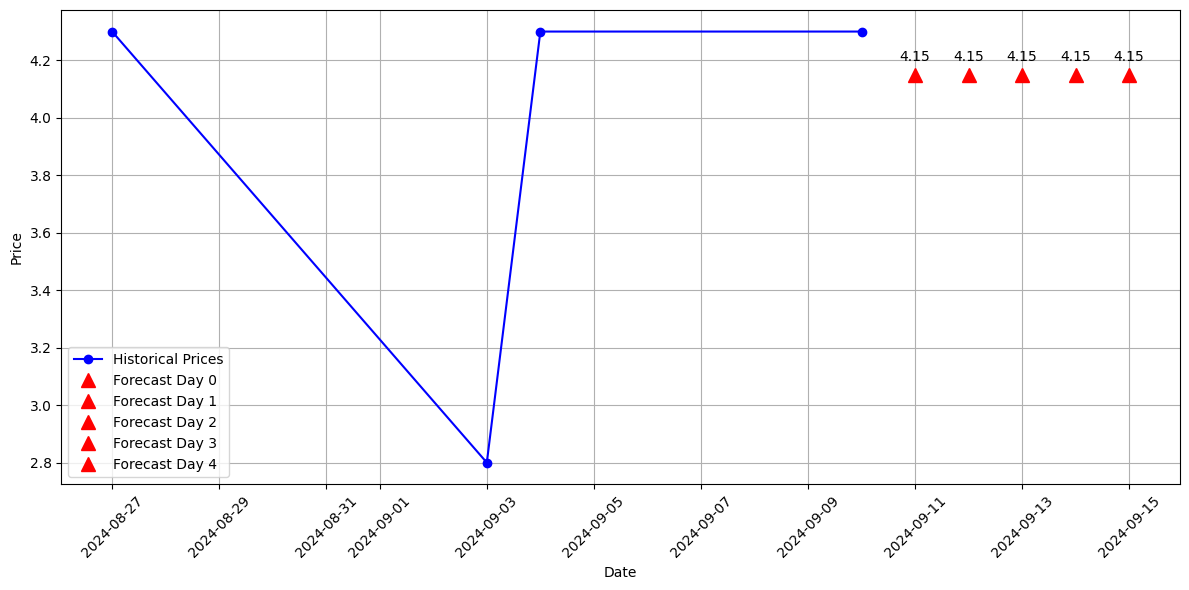

In [52]:
test_code = sampled_product_codes[0]
forecast_data =forecasts[test_code]
product_data = combined_df[(combined_df['Product Code'] == test_code)]
# get Item Catagory and Item Name
item_category = product_data['Category'].iloc[0]
item_name = product_data['Item Name'].iloc[0]
print(f"Product Code: {test_code}, Category: {item_category}, Item Name: {item_category}")
ts = combined_df[(combined_df['Product Code'] == test_code)]['Item Price'].astype(float).resample('D').last().fillna(method='ffill')

# print(product_data)
# print(forecast_data)


# prep the ts data
ts = product_data['Item Price'].astype(float).dropna()

# plot historial
plt.figure(figsize=(12, 6))
plt.plot(ts.index, ts, 'b-o', label='Historical Prices', linestyle='-', marker='o')
# Generating and plotting the 7th day forecast
last_date = ts.index[-1]  # Use the last available data point
future_date = last_date + pd.Timedelta(days=1)
forecast_price = forecast_data['forecast']  # Assuming the forecast data contains the 7th day forecast directly
# print(last_date)
# print("TEST")
# print(future_date, forecast_price)
future_dates = [future_date + pd.Timedelta(days=i) for i in range(len(forecast_price))]

# using pd.date_range
future_dates = pd.date_range(start=future_date, periods=len(forecast_price), freq='D')
# print(future_dates)
# Plot the future forecast point
# plt.plot(future_dates, forecast_price, 'r^', markersize=10, label='Forecast next day')  # Red triangle marker for forecast


for i , (date, price) in enumerate(zip(future_dates, forecast_price)):
  plt.plot(date, price, 'r^', markersize=10, label=f'Forecast Day {i}')  # Red triangle marker for forecast
  plt.annotate(f"{price:.2f}", (date, price), textcoords="offset points", xytext=(0,10), ha='center')

# Highlight the forecast pt
# plt.annotate(f"{forecast_price:.2f}", (future_dates, forecast_price), textcoords="offset points", xytext=(0,10), ha='center')
# plt.title(f'Forecast for {item_name} ({item_category}) using {forecast_data["method"]}', fontsize=16)
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Product Code: 272090, Category: Dairy, Eggs & Fridge, Item Name: Dairy, Eggs & Fridge


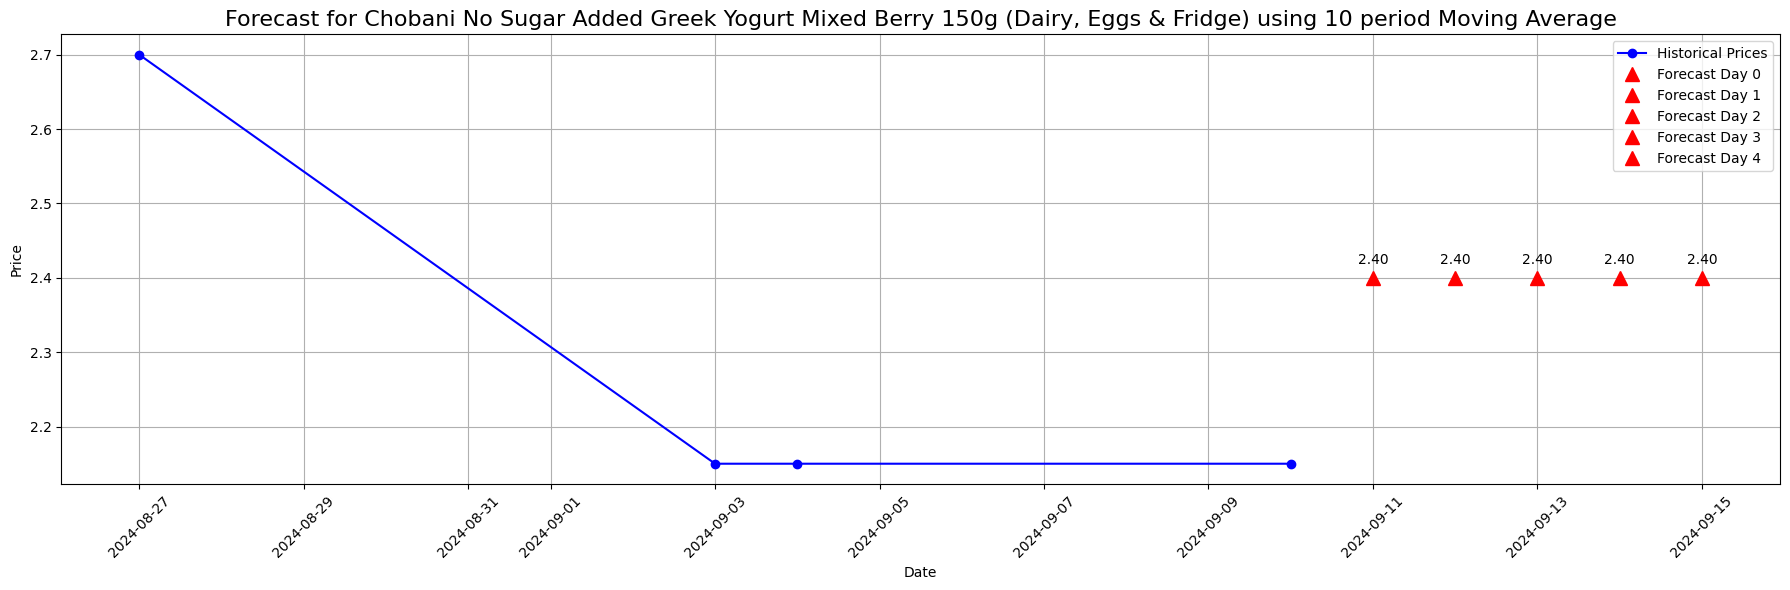

Product Code: 196164, Category: Home & Lifestyle, Item Name: Home & Lifestyle


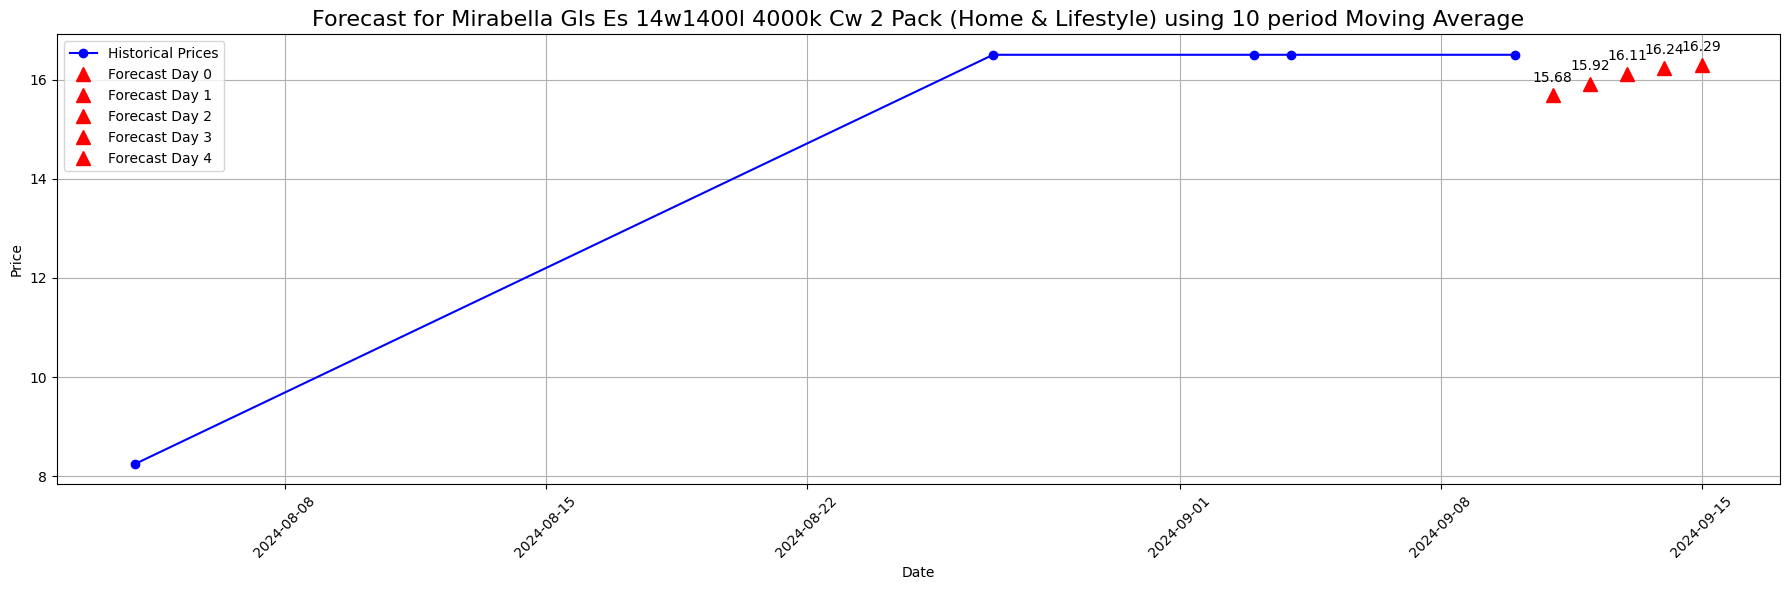

Product Code: 754075, Category: Cleaning & Maintenance, Item Name: Cleaning & Maintenance


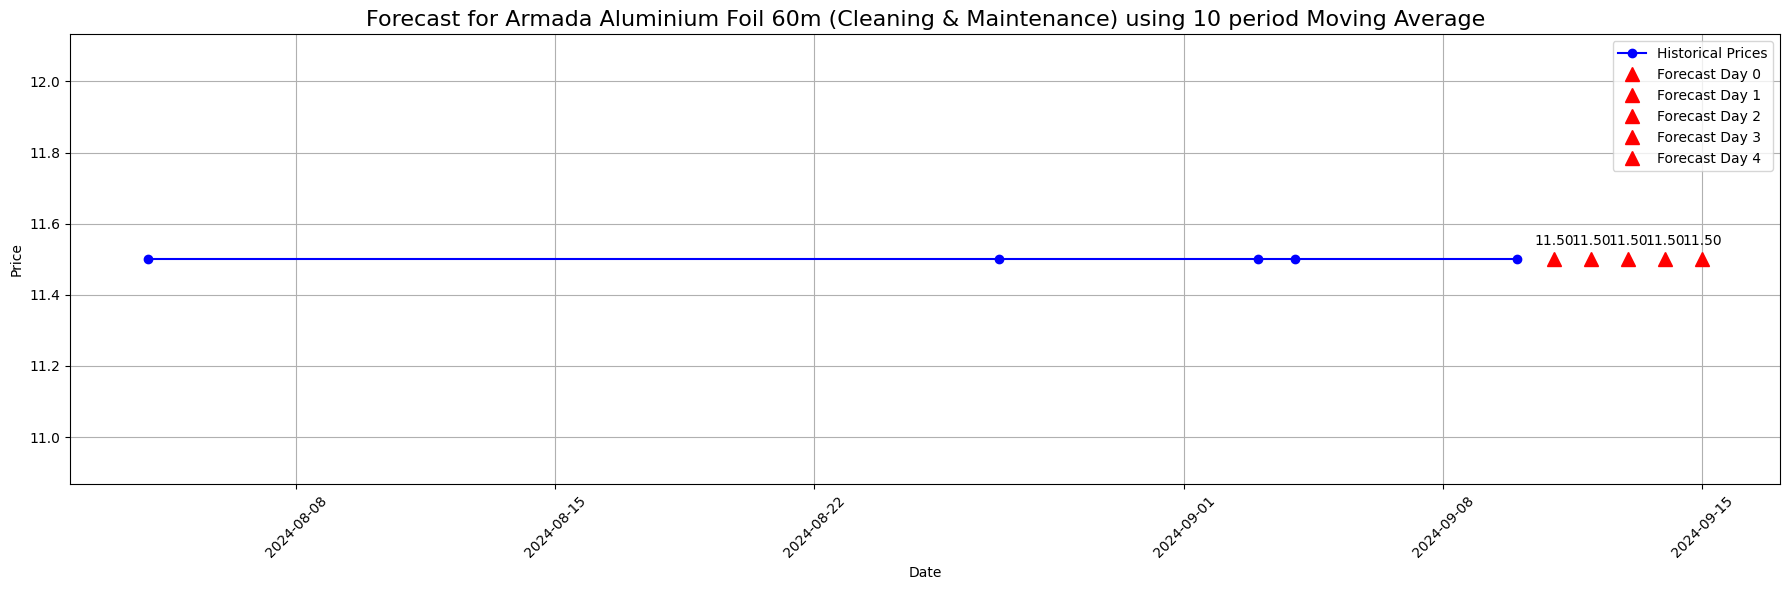

Product Code: 341468, Category: Snacks & Confectionery, Item Name: Snacks & Confectionery


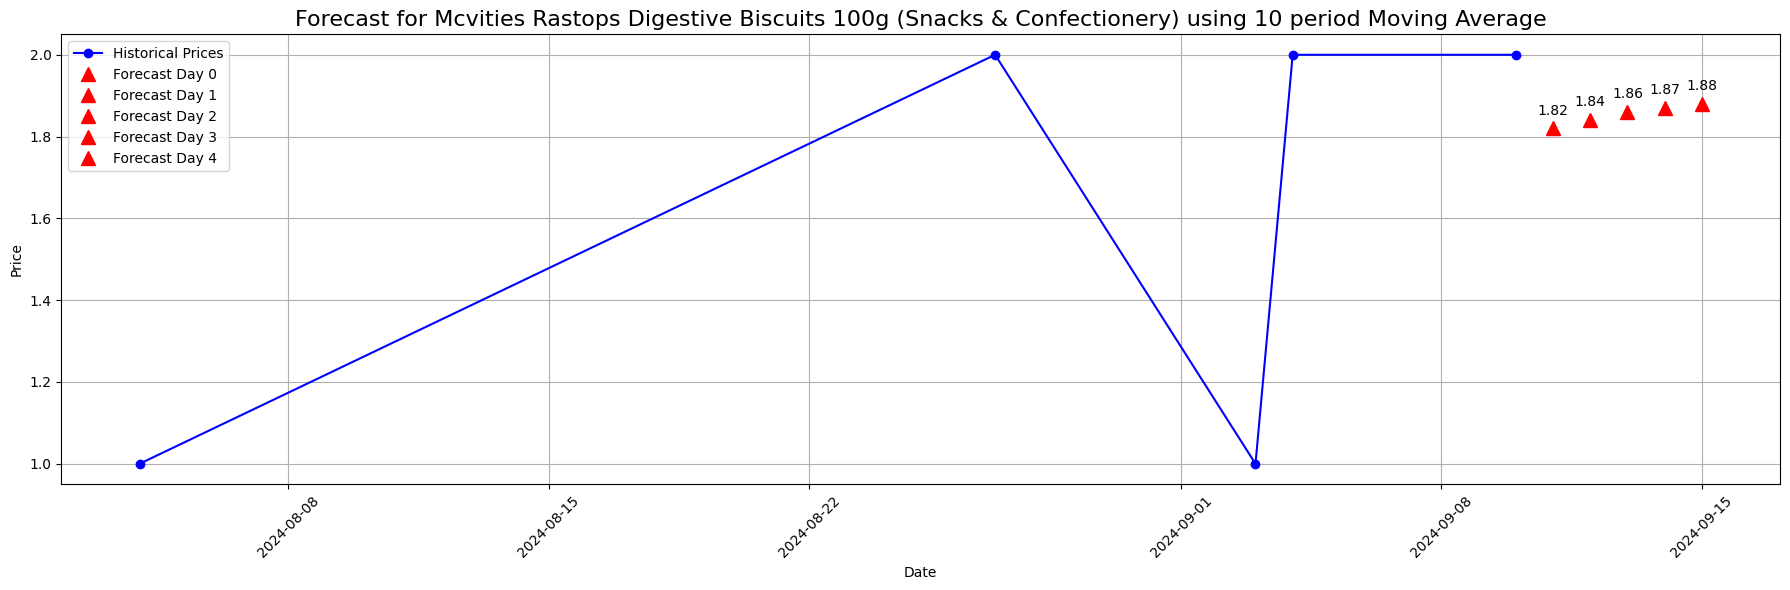

Product Code: 227461, Category: Freezer, Item Name: Freezer


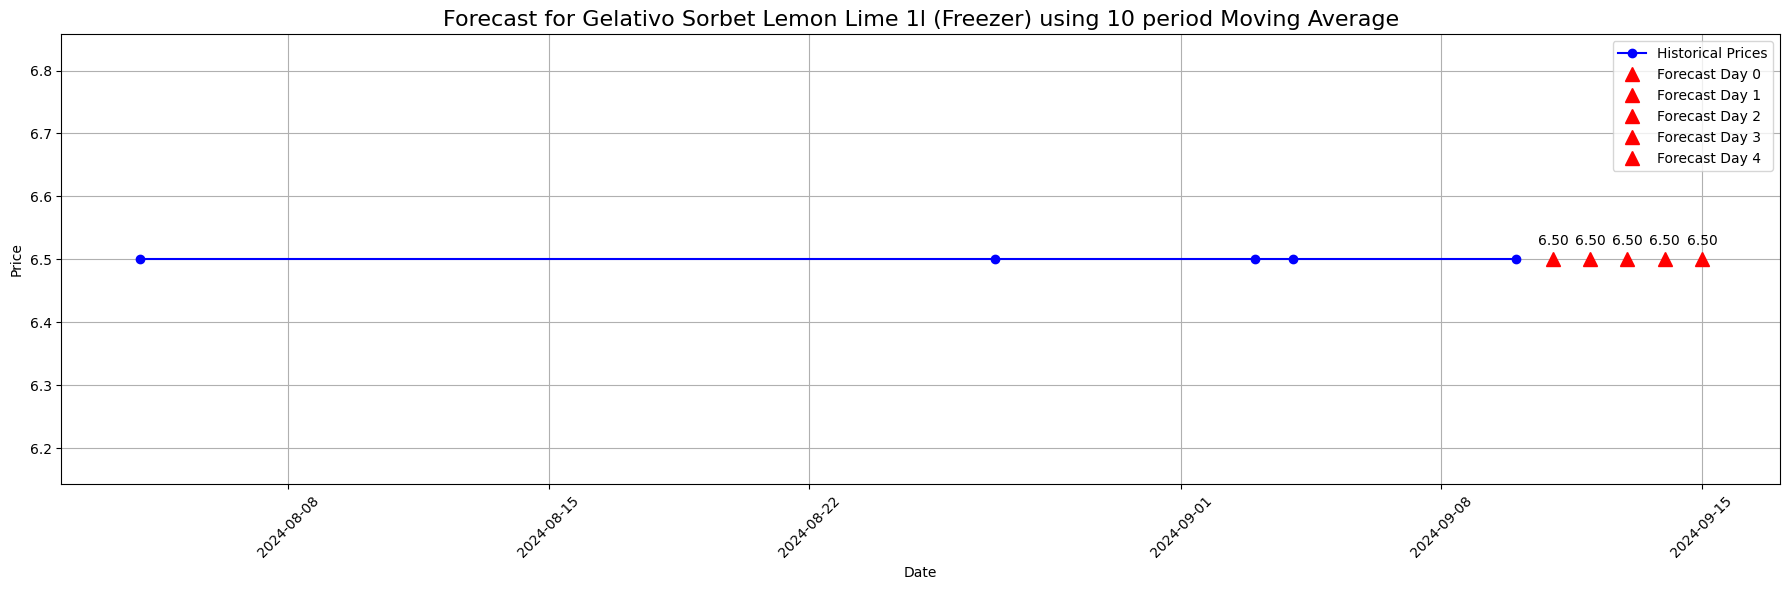

Product Code: 162569, Category: Home & Lifestyle, Item Name: Home & Lifestyle


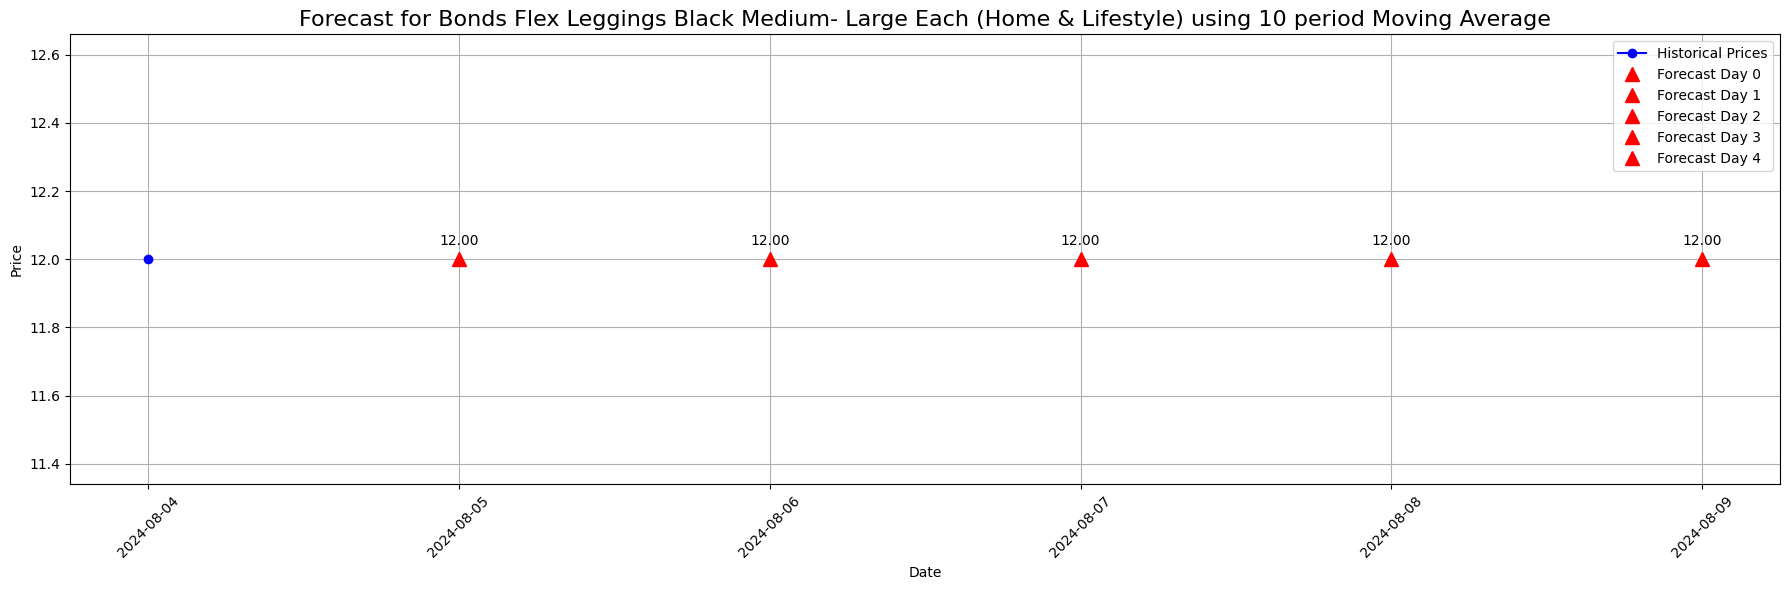

Product Code: 319428, Category: Pantry, Item Name: Pantry


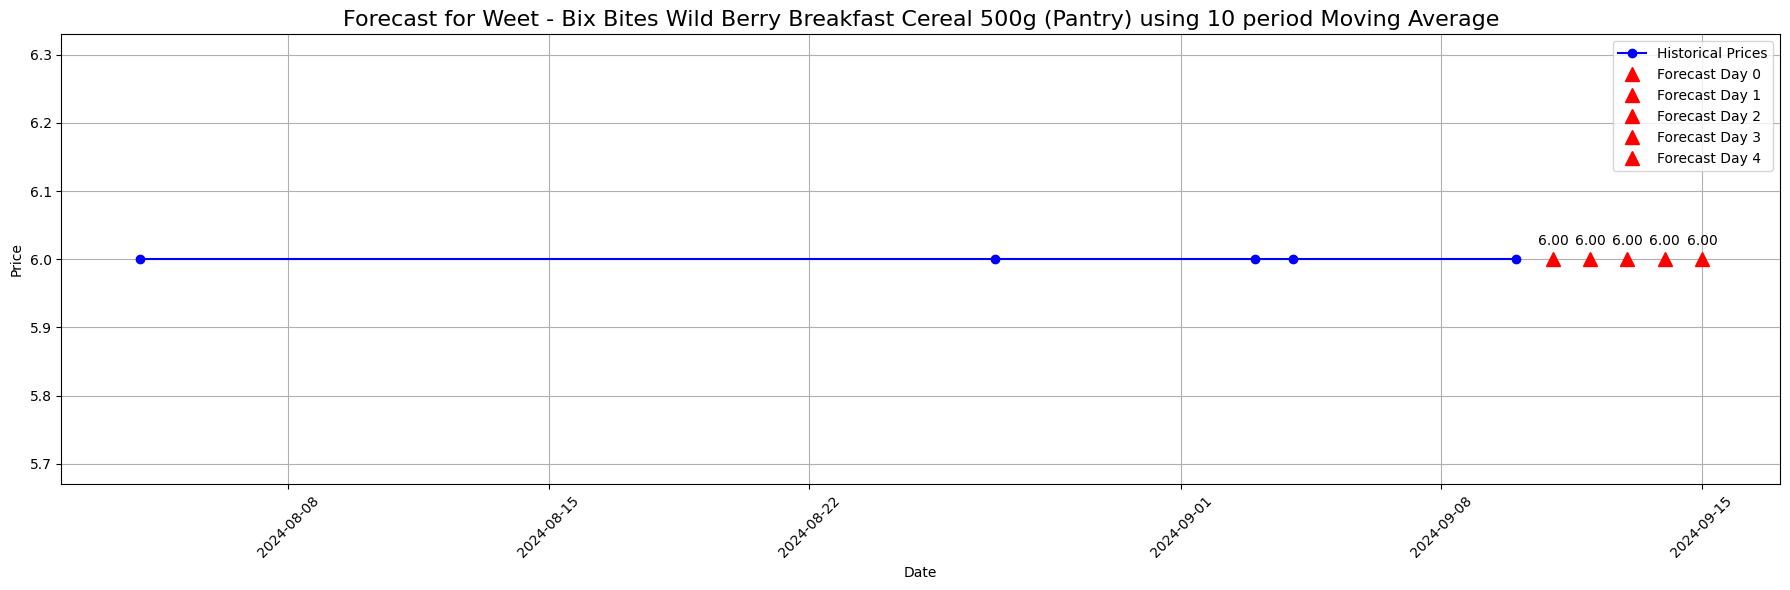

Product Code: 385994, Category: Freezer, Item Name: Freezer


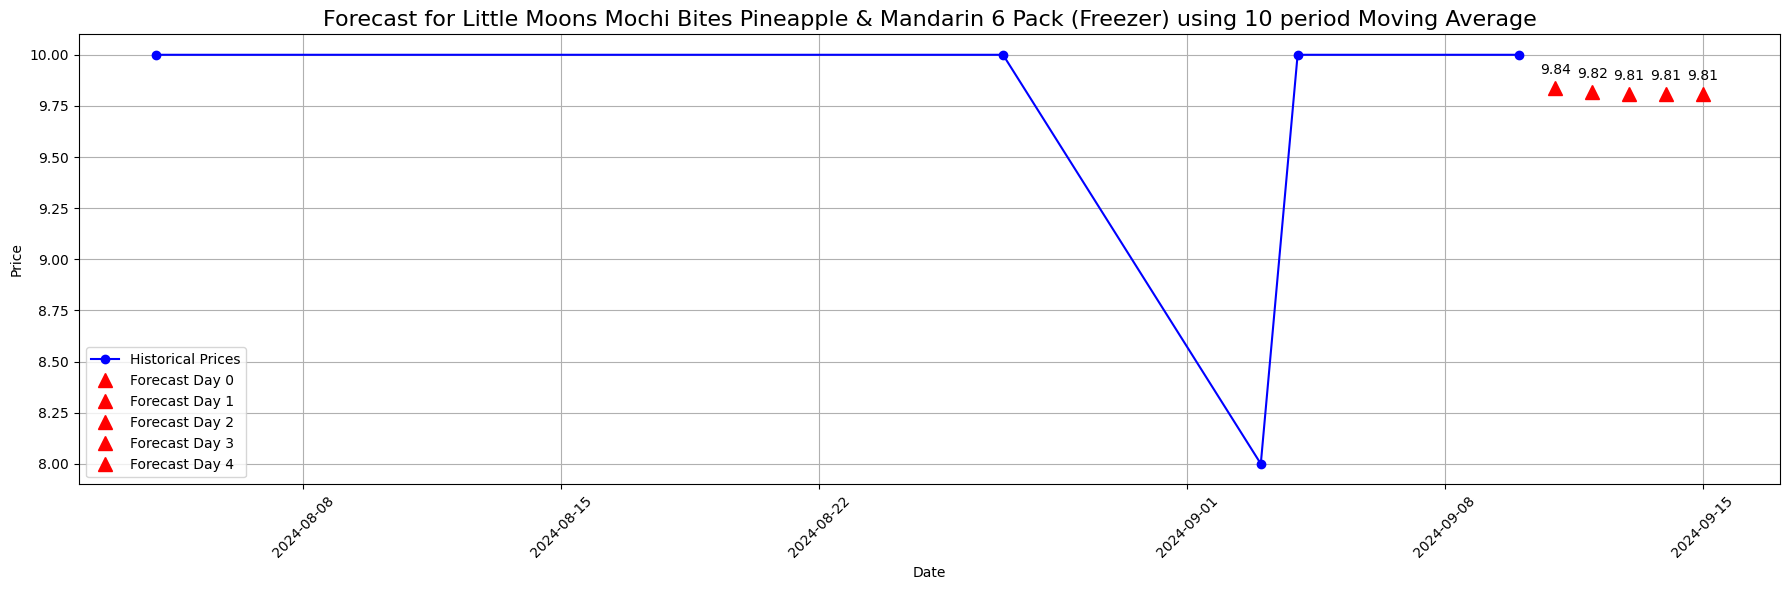

Product Code: 263470, Category: Home & Lifestyle, Item Name: Home & Lifestyle


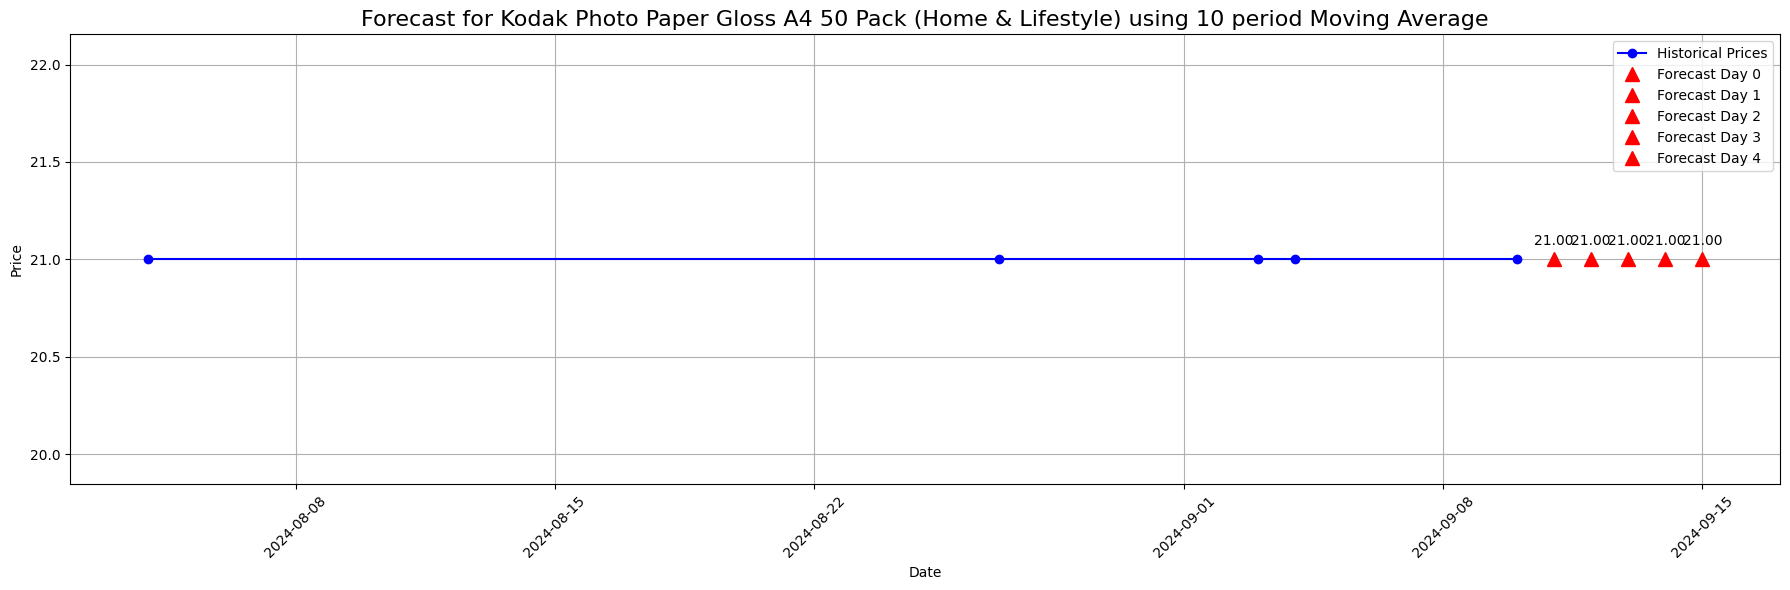

Product Code: 370877, Category: Beauty & Personal Care, Item Name: Beauty & Personal Care


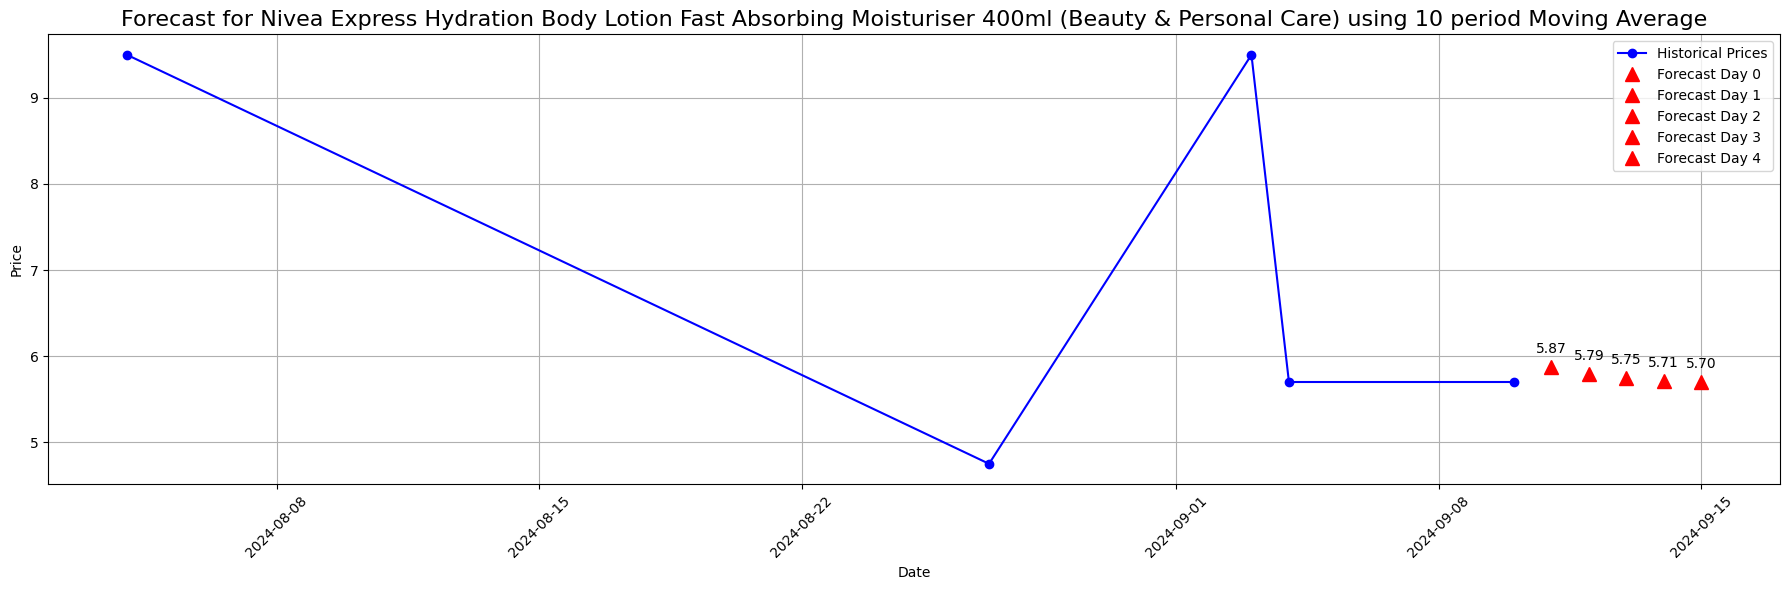

In [54]:

## chose 10 radnom sample codes
sample_code_random = random.sample(list(sampled_product_codes),10)

for code in sample_code_random:
  # test_code = sampled_product_codes[0]
  test_code = code
  forecast_data =forecasts[test_code]
  product_data = combined_df[(combined_df['Product Code'] == test_code)]
  # get Item Catagory and Item Name
  item_category = product_data['Category'].iloc[0]
  item_name = product_data['Item Name'].iloc[0]
  print(f"Product Code: {test_code}, Category: {item_category}, Item Name: {item_category}")
  ts = combined_df[(combined_df['Product Code'] == test_code)]['Item Price'].astype(float).resample('D').last().fillna(method='ffill')

  # print(product_data)
  # print(forecast_data)


  # prep the ts data
  ts = product_data['Item Price'].astype(float).dropna()

  # plot historial
  plt.figure(figsize=(18, 6))
  plt.plot(ts.index, ts, 'b-o', label='Historical Prices', linestyle='-', marker='o')
  # Generating and plotting the 7th day forecast
  last_date = ts.index[-1]  # Use the last available data point
  future_date = last_date + pd.Timedelta(days=1)
  forecast_price = forecast_data['forecast']  # Assuming the forecast data contains the 7th day forecast directly
  # print(last_date)
  # print("TEST")
  # print(future_date, forecast_price)
  future_dates = [future_date + pd.Timedelta(days=i) for i in range(len(forecast_price))]

  # using pd.date_range
  future_dates = pd.date_range(start=future_date, periods=len(forecast_price), freq='D')
  # print(future_dates)
  # Plot the future forecast point
  # plt.plot(future_dates, forecast_price, 'r^', markersize=10, label='Forecast next day')  # Red triangle marker for forecast


  for i , (date, price) in enumerate(zip(future_dates, forecast_price)):
    plt.plot(date, price, 'r^', markersize=10, label=f'Forecast Day {i}')  # Red triangle marker for forecast
    plt.annotate(f"{price:.2f}", (date, price), textcoords="offset points", xytext=(0,10), ha='center')

  # Highlight the forecast pt
  # plt.annotate(f"{forecast_price:.2f}", (future_dates, forecast_price), textcoords="offset points", xytext=(0,10), ha='center')
  # plt.title(f'Forecast for {item_name} ({item_category}) using {forecast_data["method"]}', fontsize=16)
  plt.xlabel('Date')
  plt.ylabel('Price')
  # put title as name, catagory, type of model
  plt.title(f'Forecast for {item_name} ({item_category}) using {forecast_data["method"]}', fontsize=16)
  plt.legend()
  plt.grid(True)
  plt.xticks(rotation=45)
  plt.tight_layout()
  plt.show()

In [48]:
sample_code_random

[387009,
 667755,
 147775,
 251527,
 143661,
 236711,
 853209,
 807246,
 250552,
 907512]

## Model 2 - EMA (Exponential Moving Average)


This gives more weight on recent data points than the older ones, unlike Simple Moving Average Model

In [77]:

import random
## dict to store forecasts
forecasts = {}


## get all unique product codes
product_codes = combined_df['Product Code'].unique()

# PRINT COUNT OF UNIQUE PRODS
print(f"Number of unique product codes: {len(product_codes)}")

## set seed
random.seed(42)
ProdCount =50 #
window =10 # the period of rolling exp. moving average window
forecast_Days = 7 # we are forecasting next N days
# ProdCount = len(product_codes) # <<<<uncomment to run on whole data
# Sample a few prod codes for output and plots
sampled_product_codes = random.sample(list(product_codes),ProdCount)
## number of sheets in Gsheet
NumberofDates = len(list(all_data.keys()))

# Process each product code
for product_code in sampled_product_codes:
    # Filter data for the current product code
    product_data = combined_df[combined_df['Product Code'] == product_code]
    # print(product_data)
    ts = product_data['Item Price'].astype(float).dropna().resample('D').last().fillna(method='ffill')
    # print(ts)

    # prep the ts data
    # ts = product_data['Item Price'].astype(float).dropna().resample('D').last().
    # print(ts)
    if len(ts) >= window:# check if we have sufficient data points
        ## calculate EMA
        ema = ts.ewm(span=window, adjust=True).mean()[-1]
        # print(ts.ewm(span=window, adjust=True).mean())
        forecast_values = []
        last_ema = ema
        extended_ts = ma.copy()

        # forecast for next n days iteratively
        for i in range(forecast_Days):
          if len(extended_ts) >= window:
            next_forecast = last_ema


            # updating EMA with new forecast values
            # formua : EMA(t) = alpha * value(t) + (1- alpha) * EMA(t-1)

            alpha = 2 / (window +1)
            last_ema = alpha * next_forecast + (1-alpha) * last_ema

            forecast_values.append(next_forecast)
            # extended_ts = extended_ts.append(pd.Series([next_forecast], index=[extended_ts.index[-1] + pd.DateOffset(days=1)]))
            # extended_ts = pd.concat([extended_ts, pd.Series([next_forecast], index=[extended_ts.index[-1] + pd.DateOffset(days=1)])])
          else:
            break # not enuf data to proceed

          forecasts[product_code] = {'forecast': forecast_values, 'method': f'Rolling {window} period Exponential Moving Average'}

        else:
          forecasts[product_code] = {'forecast': [ts.iloc[-1]]*forecast_Days, 'method': f'Rolling {window} period Exponential Moving Average'}

    else:
        print("notenuf")
        # Use last available price for forecasting

        forecasts[product_code] = {'forecast': [ts.iloc[-1]]*forecast_Days, 'method': f'Rolling {window} period Exponential Moving Average'}



## print few samples for verification
for code, data in forecasts.items():
  print(f"Product Code: {code}, Forecast: {data['forecast']}, Method: {data['method']}")

Number of unique product codes: 22625
notenuf
notenuf
notenuf
notenuf
notenuf
Product Code: 321163, Forecast: [4.3, 4.3, 4.3, 4.3, 4.3, 4.3, 4.3], Method: Rolling 10 period Exponential Moving Average
Product Code: 110572, Forecast: [14.5, 14.5, 14.5, 14.5, 14.5, 14.5, 14.5], Method: Rolling 10 period Exponential Moving Average
Product Code: 33637, Forecast: [2.2, 2.2, 2.2, 2.2, 2.2, 2.2, 2.2], Method: Rolling 10 period Exponential Moving Average
Product Code: 261341, Forecast: [6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0], Method: Rolling 10 period Exponential Moving Average
Product Code: 235131, Forecast: [4.75, 4.75, 4.75, 4.75, 4.75, 4.75, 4.75], Method: Rolling 10 period Exponential Moving Average
Product Code: 221696, Forecast: [4.4, 4.4, 4.4, 4.4, 4.4, 4.4, 4.4], Method: Rolling 10 period Exponential Moving Average
Product Code: 143627, Forecast: [6.9, 6.9, 6.9, 6.9, 6.9, 6.9, 6.9], Method: Rolling 10 period Exponential Moving Average
Product Code: 102976, Forecast: [3.9, 3.9, 3.9, 3.9, 3.

Product Code: 815793, Category: Freezer, Item Name: Freezer


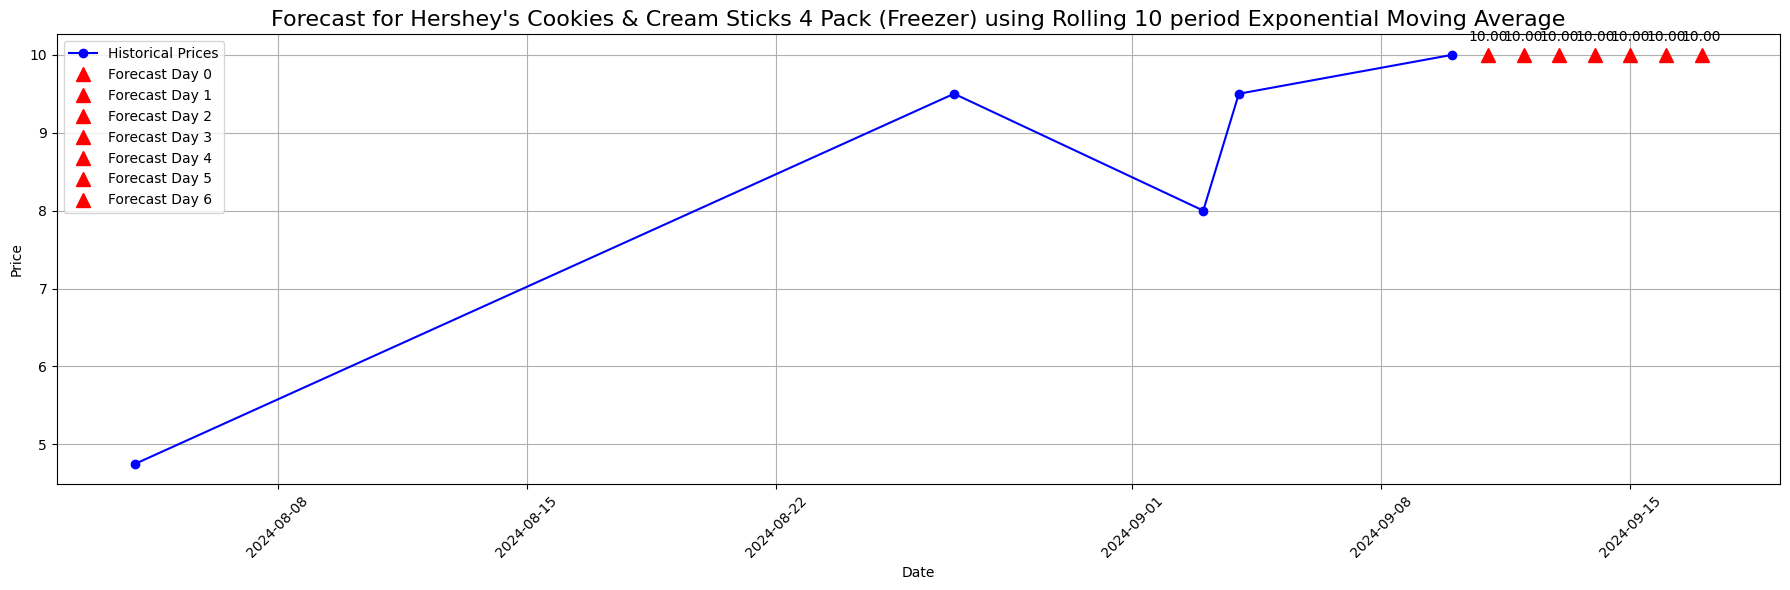

Product Code: 221696, Category: Home & Lifestyle, Item Name: Home & Lifestyle


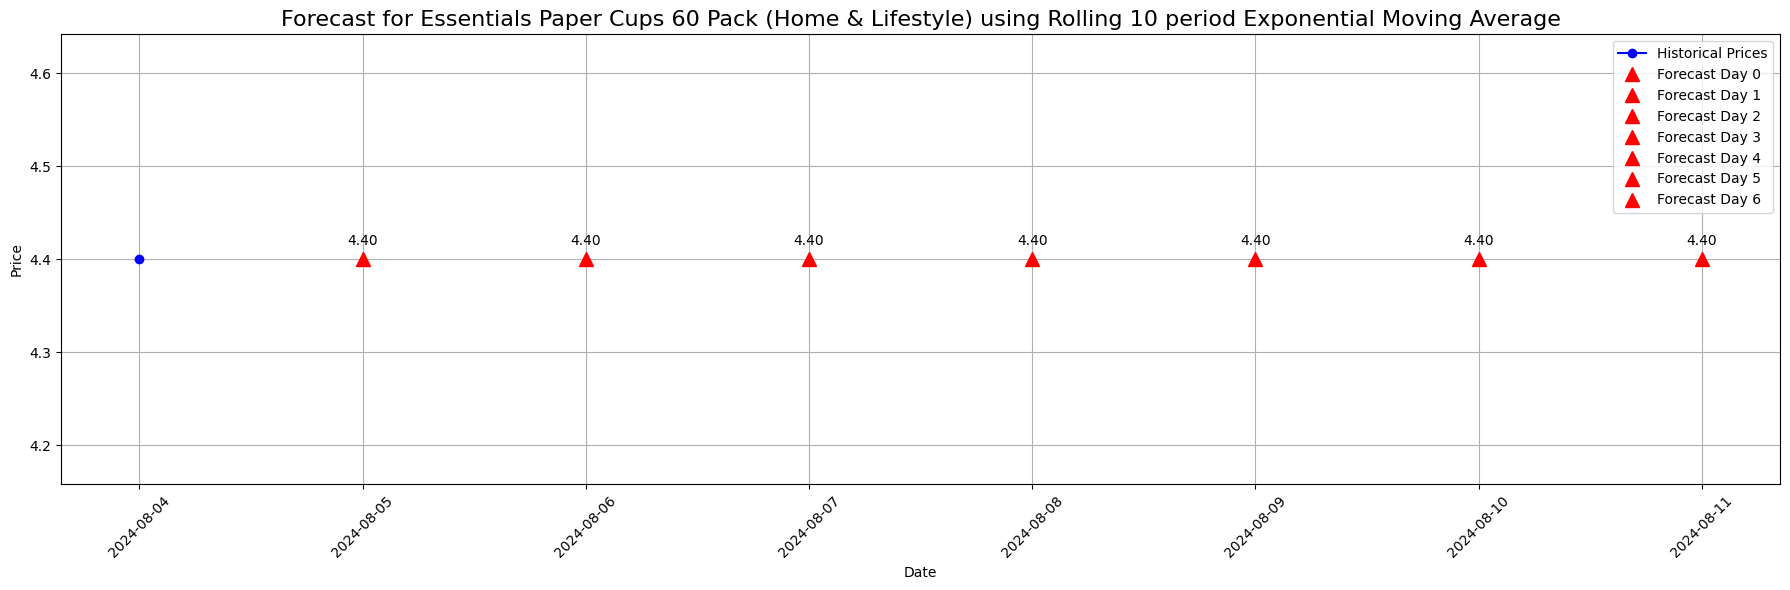

Product Code: 159329, Category: Pantry, Item Name: Pantry


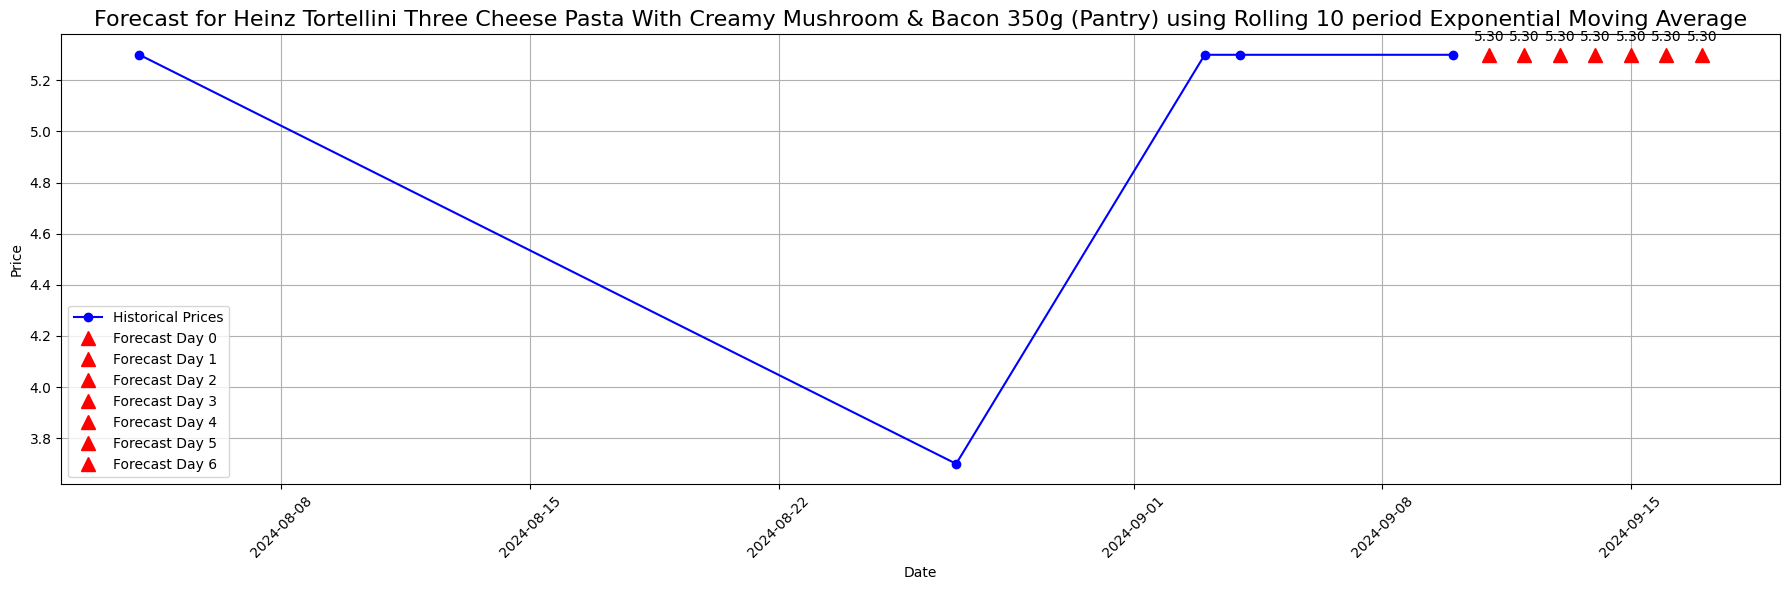

Product Code: 754075, Category: Cleaning & Maintenance, Item Name: Cleaning & Maintenance


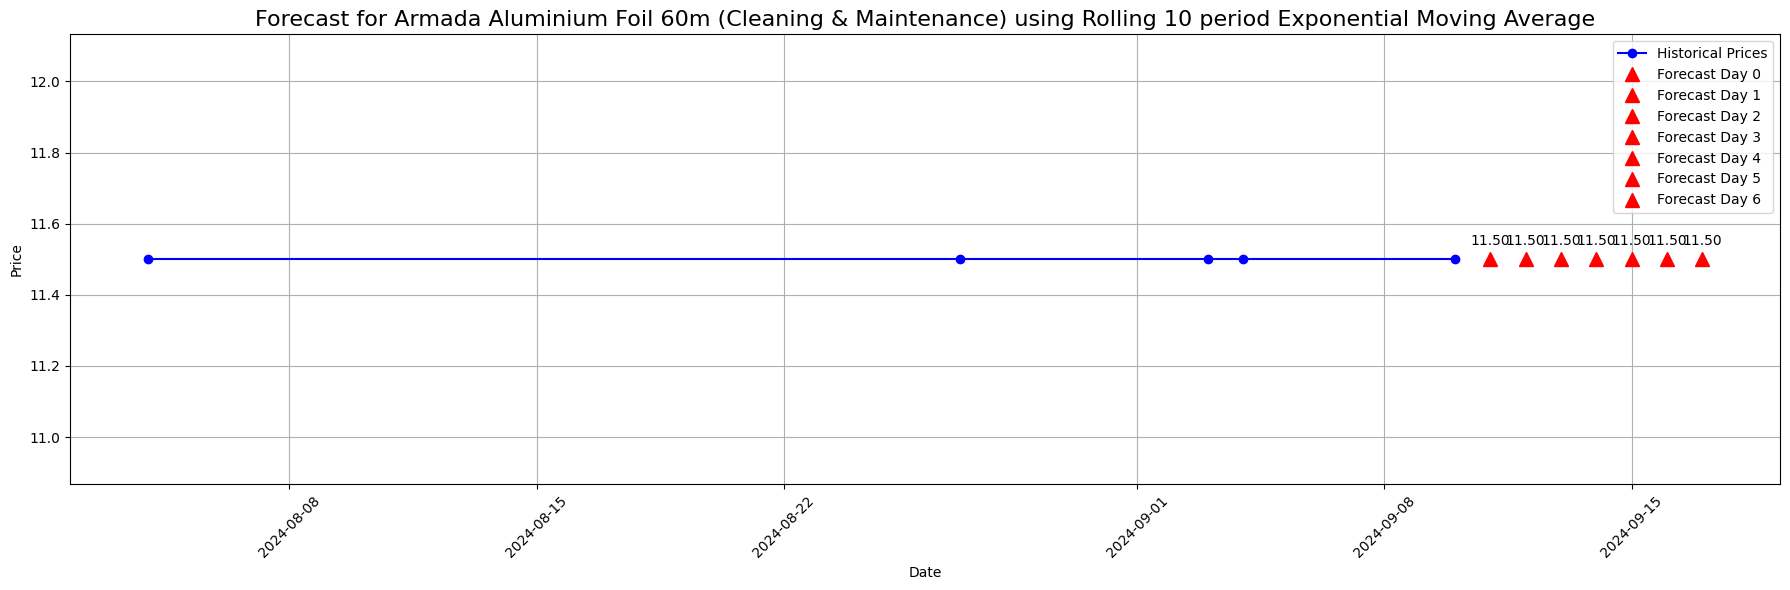

Product Code: 413886, Category: Fruit & Veg, Item Name: Fruit & Veg


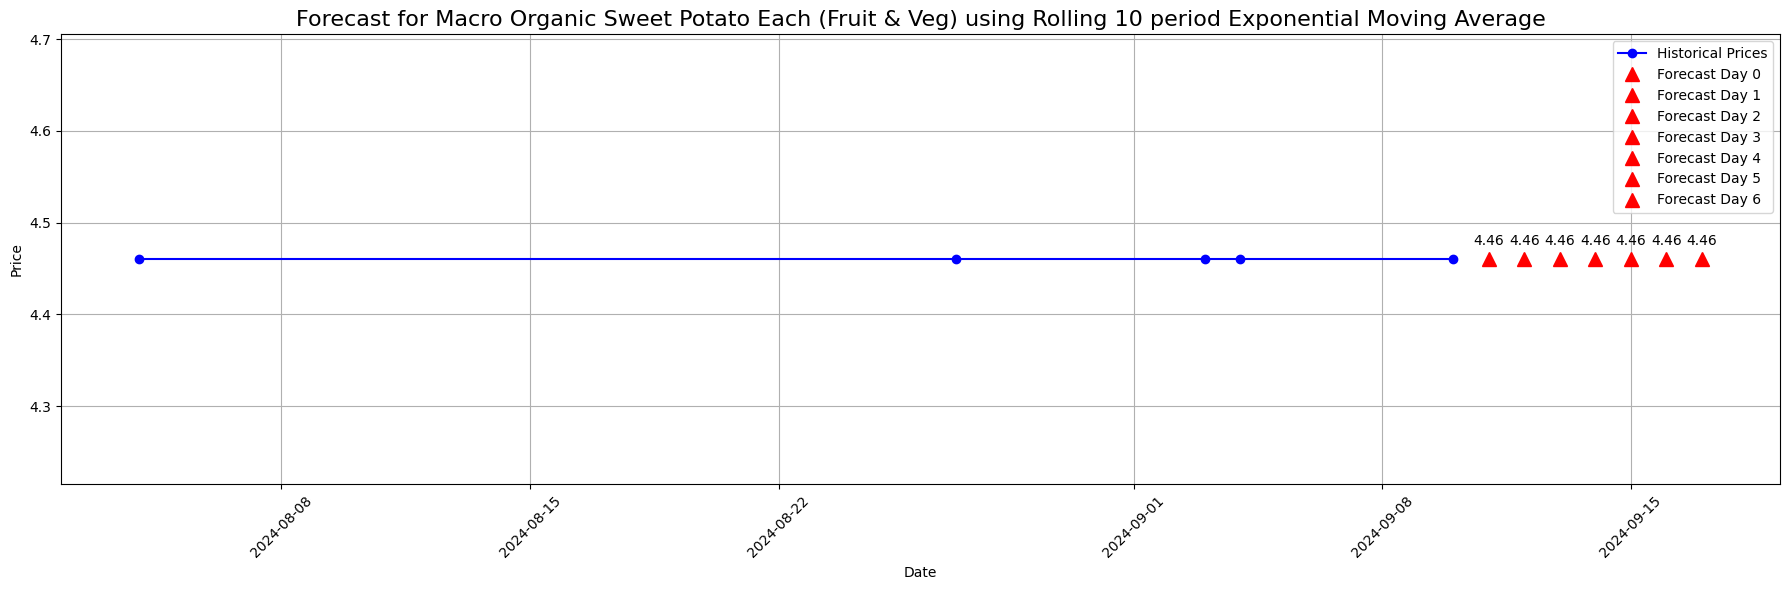

Product Code: 94745, Category: Home & Lifestyle, Item Name: Home & Lifestyle


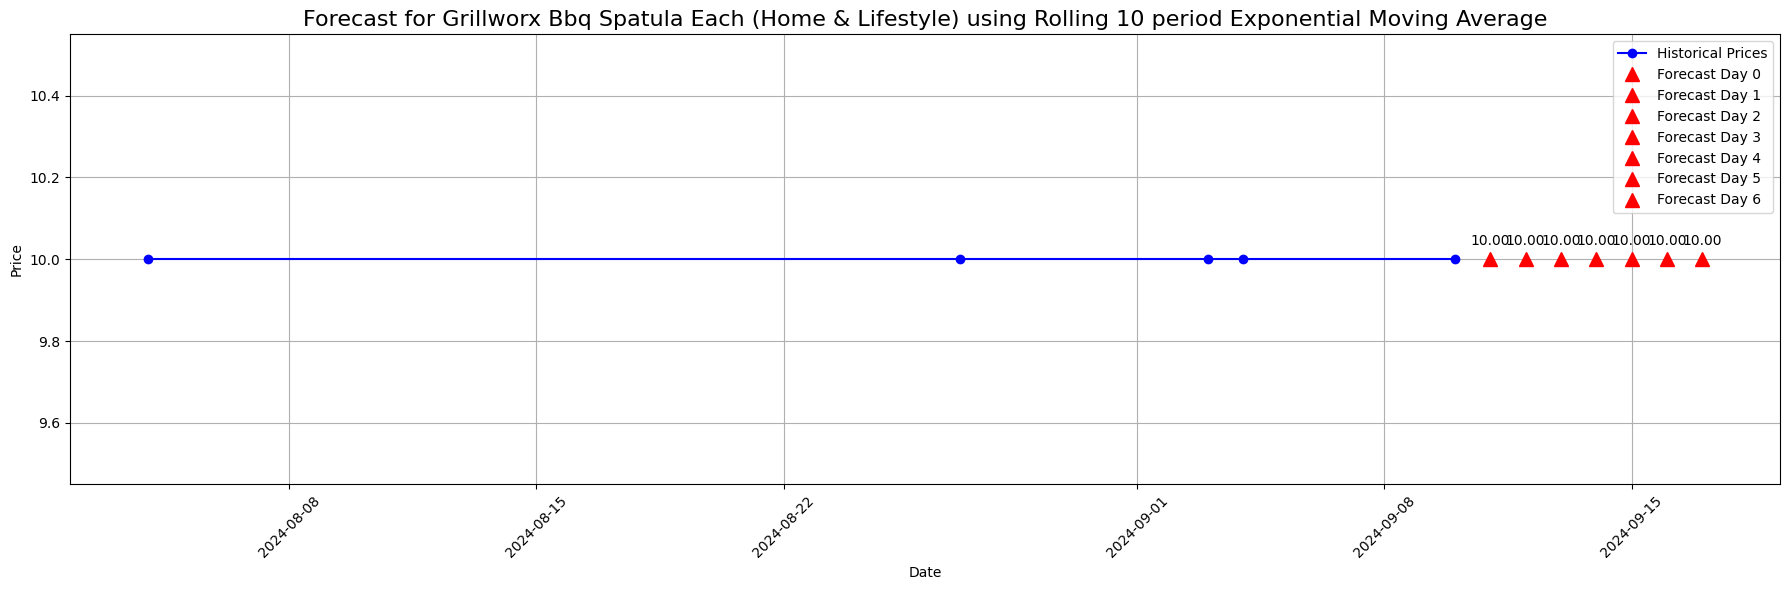

Product Code: 514317, Category: Snacks & Confectionery, Item Name: Snacks & Confectionery


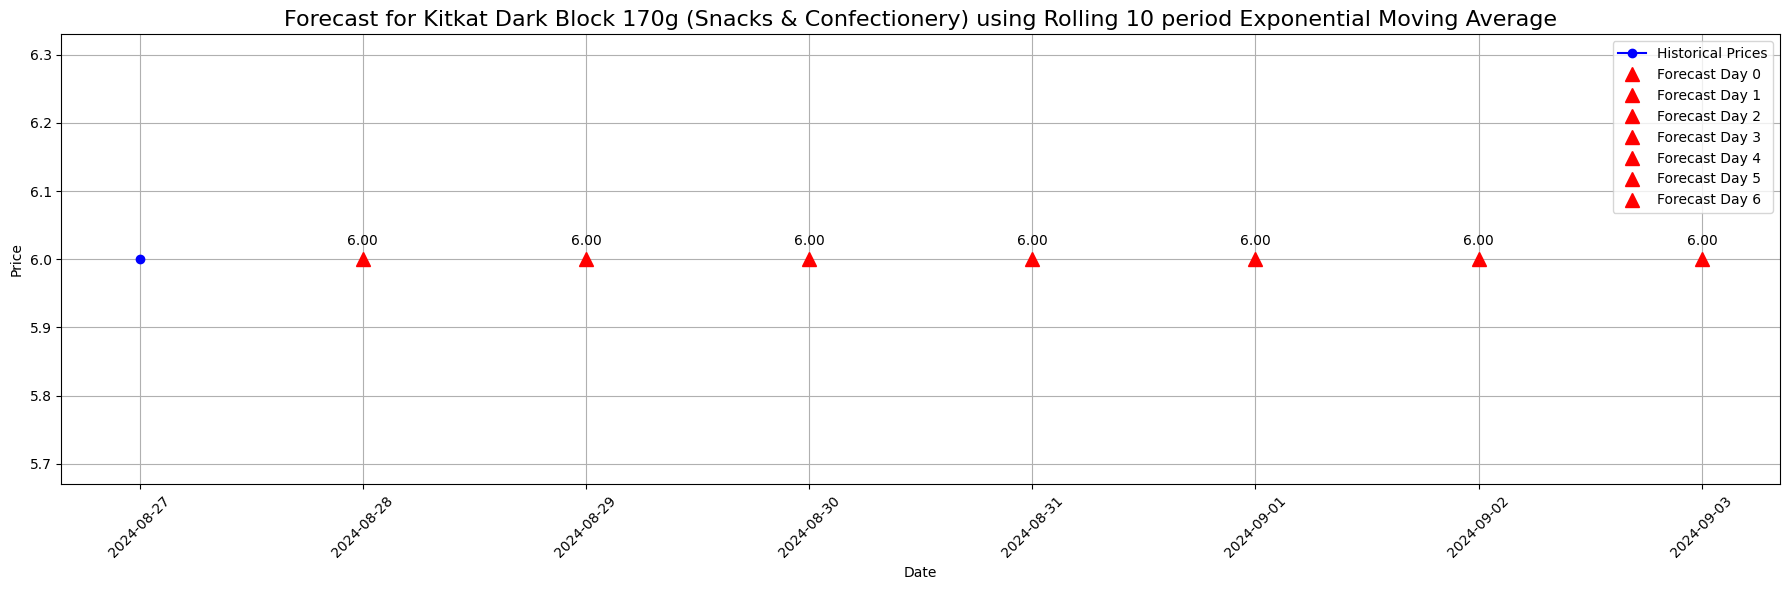

Product Code: 214963, Category: Cleaning & Maintenance, Item Name: Cleaning & Maintenance


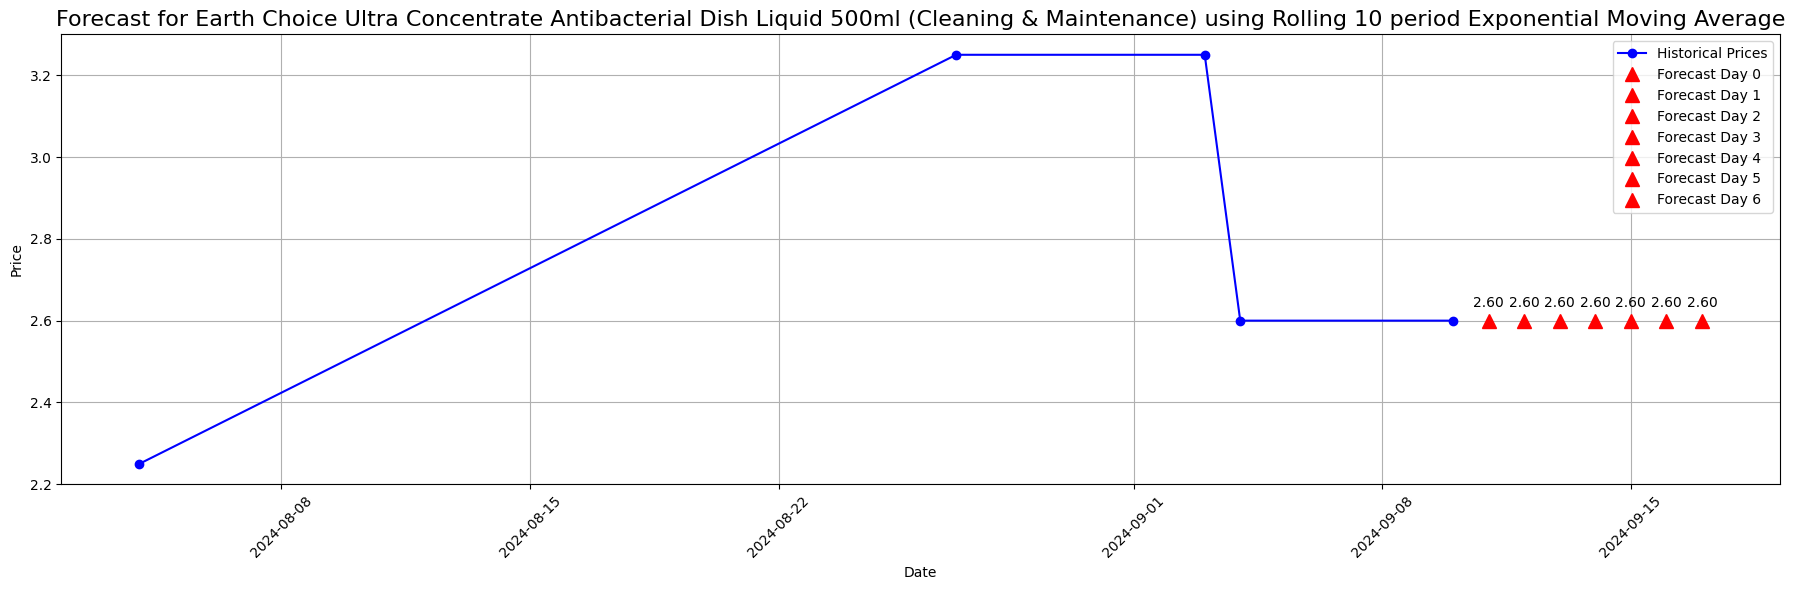

Product Code: 561890, Category: Drinks, Item Name: Drinks


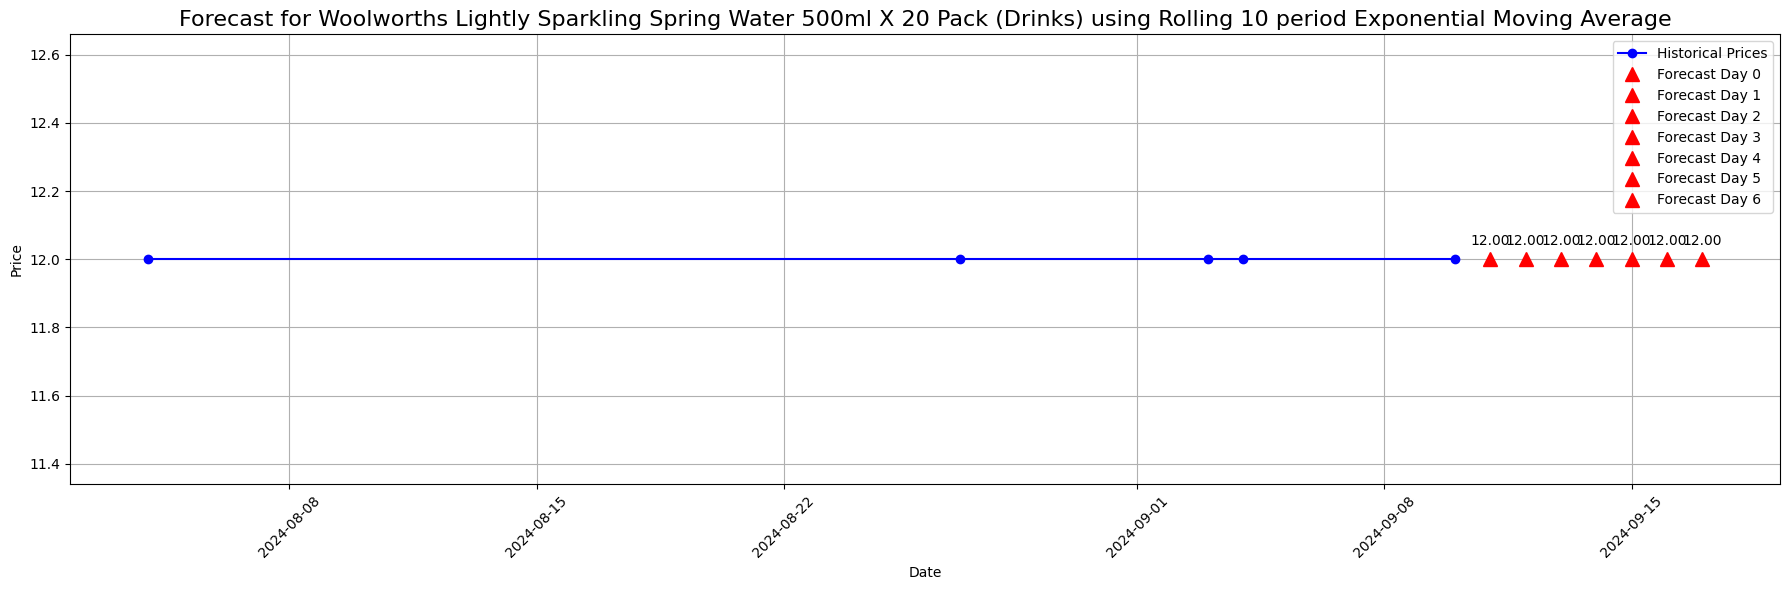

Product Code: 235131, Category: Pantry, Item Name: Pantry


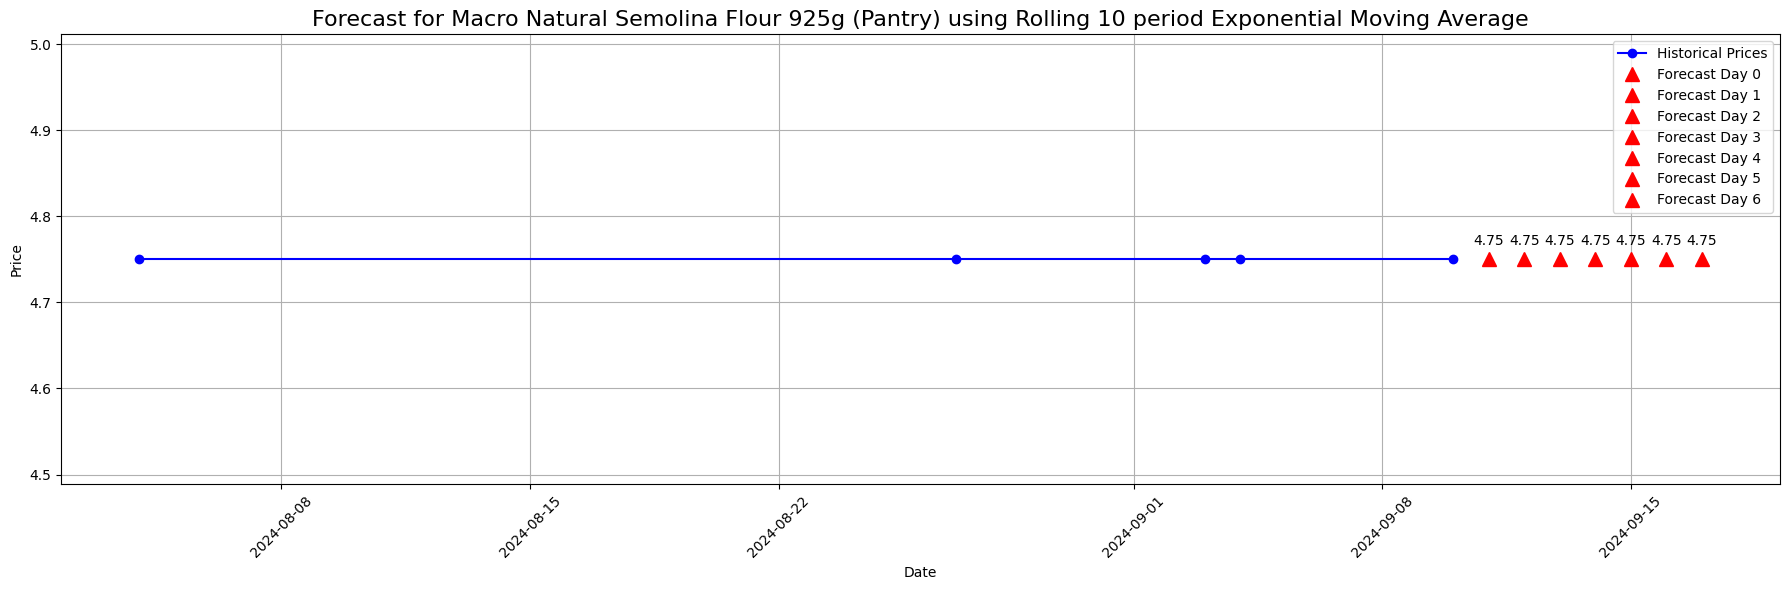

In [78]:

## chose 10 radnom sample codes
sample_code_random = random.sample(list(sampled_product_codes),10)

for code in sample_code_random:
  # test_code = sampled_product_codes[0]
  test_code = code
  forecast_data =forecasts[test_code]
  product_data = combined_df[(combined_df['Product Code'] == test_code)]
  # get Item Catagory and Item Name
  item_category = product_data['Category'].iloc[0]
  item_name = product_data['Item Name'].iloc[0]
  print(f"Product Code: {test_code}, Category: {item_category}, Item Name: {item_category}")
  ts = combined_df[(combined_df['Product Code'] == test_code)]['Item Price'].astype(float).resample('D').last().fillna(method='ffill')

  # print(product_data)
  # print(forecast_data)


  # prep the ts data
  ts = product_data['Item Price'].astype(float).dropna()

  # plot historial
  plt.figure(figsize=(18, 6))
  plt.plot(ts.index, ts, 'b-o', label='Historical Prices', linestyle='-', marker='o')
  # Generating and plotting the 7th day forecast
  last_date = ts.index[-1]  # Use the last available data point
  future_date = last_date + pd.Timedelta(days=1)
  forecast_price = forecast_data['forecast']  # Assuming the forecast data contains the Nth day forecast directly
  # print(last_date)
  # print("TEST")
  # print(future_date, forecast_price)
  future_dates = [future_date + pd.Timedelta(days=i) for i in range(len(forecast_price))]

  # using pd.date_range
  future_dates = pd.date_range(start=future_date, periods=len(forecast_price), freq='D')
  # print(future_dates)
  # Plot the future forecast point
  # plt.plot(future_dates, forecast_price, 'r^', markersize=10, label='Forecast next day')  # Red triangle marker for forecast


  for i , (date, price) in enumerate(zip(future_dates, forecast_price)):
    plt.plot(date, price, 'r^', markersize=10, label=f'Forecast Day {i}')  # Red triangle marker for forecast
    plt.annotate(f"{price:.2f}", (date, price), textcoords="offset points", xytext=(0,10), ha='center')

  # Highlight the forecast pt
  # plt.annotate(f"{forecast_price:.2f}", (future_dates, forecast_price), textcoords="offset points", xytext=(0,10), ha='center')
  # plt.title(f'Forecast for {item_name} ({item_category}) using {forecast_data["method"]}', fontsize=16)
  plt.xlabel('Date')
  plt.ylabel('Price')
  # put title as name, catagory, type of model
  plt.title(f'Forecast for {item_name} ({item_category}) using {forecast_data["method"]}', fontsize=16)
  plt.legend()
  plt.grid(True)
  plt.xticks(rotation=45)
  plt.tight_layout()
  plt.show()

MA (Moving Average) - this is 10 period rolling moving average model, it captures trend of the price change, and this can be reflected in the sample product graphs as well. Except in the cases where there is constant price, it simply carries the same price forward.



EMA (Exponential Moving Average) converges to last value very quickly as there are only 5 or less data points in each product price data.
After convergence it simply replicates the last ema value, this behaviour arises due to EMA tendancy to put more weights on recent datapoints than the earlier data points. so without new data to shift the trend, the model will naturally shift to its last calculated value.

We can add noise , EMA decay factor for improvement - but its all limited due to 5 or less data points per product.